# **Ouroboros fMRI: Predicting human brain activity with machine learning models**

#### Version: 10th March 2021

==============================================================================================

Project developed by Maël Donoso, Ph.D. in Cognitive and Computational Neuroscience. Affiliations: Ouroboros Neurotechnologies (https://ouroboros-neurotechnologies.com/), Institut Lémanique du Cerveau (https://institut-cerveau.ch/), Policlinique Ostéopathique de Lausanne (https://policlinique-osteopathique-lausanne.ch/). 

The first version of this project (17th February 2021) was presented as a Capstone Project for the COS in Applied Data Science: Machine Learning of the EPFL Extension School (https://www.extensionschool.ch/).

==============================================================================================

This project is presented through six Notebooks:

*01: Data Analysis*

*02: Classification* (all classification models except neural networks)

*03: Neural Networks*

*04: Regression*

***05: Results***

*06: Complements*

==============================================================================================

### Notebook 05

# **Results**

## **1. Functions**

In the following cells, we define functions to **load the results** obtained in the previous Notebooks. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [2]:
# Define the results path. If empty, the results will be loaded from the current directory. 
results_path = ''

In [3]:
# Define a function to load the classification results from a specific rescale mode. 
def load_classification_results(rescale_mode):
    
    # Load classification results. 
    with np.load(results_path + 'classification_results' + rescale_mode + '.npz', allow_pickle = False) as npz_file:
        data_dict = dict(npz_file.items())
        
    # Define variables as global. 
    global test_score_knn, test_score_dt, test_score_rf, test_score_svm, test_score_logreg
    global y_pred_knn, y_pred_dt, y_pred_rf, y_pred_svm, y_pred_logreg
    global y_te

    # Test scores. 
    test_score_knn =    data_dict['test_score_knn']
    test_score_dt =     data_dict['test_score_dt']
    test_score_rf =     data_dict['test_score_rf']
    test_score_svm =    data_dict['test_score_svm']
    test_score_logreg = data_dict['test_score_logreg']

    # Predictions. 
    y_pred_knn =    data_dict['y_pred_knn']
    y_pred_dt =     data_dict['y_pred_dt']
    y_pred_rf =     data_dict['y_pred_rf']
    y_pred_svm =    data_dict['y_pred_svm']
    y_pred_logreg = data_dict['y_pred_logreg']

    # Target. 
    y_te = data_dict['y_te']

In [4]:
# Define a function to load the neural networks results from a specific rescale mode. 
def load_neural_networks_results(rescale_mode):
    
    # Load neural networks results. 
    with np.load(results_path + 'neural_networks_results' + rescale_mode + '.npz', allow_pickle = False) as npz_file:
        data_dict = dict(npz_file.items())
        
    # Define variables as global. 
    global test_score_dense1, test_score_dense2, test_score_convnet
    global y_pred_dense1, y_pred_dense2, y_pred_convnet

    # Test scores. 
    test_score_dense1 =  data_dict['test_score_dense1']
    test_score_dense2 =  data_dict['test_score_dense2']
    test_score_convnet = data_dict['test_score_convnet']

    # Predictions. 
    y_pred_dense1 =  data_dict['y_pred_dense1']
    y_pred_dense2 =  data_dict['y_pred_dense2']
    y_pred_convnet = data_dict['y_pred_convnet']

In [5]:
# Define a function to load the regression results from a specific rescale mode. 
def load_regression_results(rescale_mode):
    
    # Load regression results. 
    with np.load(results_path + 'regression_results' + rescale_mode + '.npz', allow_pickle = False) as npz_file:
        data_dict = dict(npz_file.items())
        
    # Define variables as global. 
    global mse_baseline, mse_lr, mse_huber, mse_ridge, mse_lr_categ, mse_huber_categ, mse_ridge_categ
    global mae_baseline, mae_lr, mae_huber, mae_ridge, mae_lr_categ, mae_huber_categ, mae_ridge_categ
    global rss_baseline, rss_lr, rss_huber, rss_ridge, rss_lr_categ, rss_huber_categ, rss_ridge_categ
    global r2_baseline, r2_lr, r2_huber, r2_ridge, r2_lr_categ, r2_huber_categ, r2_ridge_categ
    global y_pred_lr, y_pred_huber, y_pred_ridge, y_pred_lr_categ, y_pred_huber_categ, y_pred_ridge_categ

    # Test scores: MSE. 
    mse_baseline =    data_dict['mse_baseline']
    mse_lr =          data_dict['mse_lr']
    mse_huber =       data_dict['mse_huber']
    mse_ridge =       data_dict['mse_ridge']
    mse_lr_categ =    data_dict['mse_lr_categ']
    mse_huber_categ = data_dict['mse_huber_categ']
    mse_ridge_categ = data_dict['mse_ridge_categ']

    # Test scores: MAE. 
    mae_baseline =    data_dict['mae_baseline']
    mae_lr =          data_dict['mae_lr']
    mae_huber =       data_dict['mae_huber']
    mae_ridge =       data_dict['mae_ridge']
    mae_lr_categ =    data_dict['mae_lr_categ']
    mae_huber_categ = data_dict['mae_huber_categ']
    mae_ridge_categ = data_dict['mae_ridge_categ']

    # Test scores: RSS. 
    rss_baseline =    data_dict['rss_baseline']
    rss_lr =          data_dict['rss_lr']
    rss_huber =       data_dict['rss_huber']
    rss_ridge =       data_dict['rss_ridge']
    rss_lr_categ =    data_dict['rss_lr_categ']
    rss_huber_categ = data_dict['rss_huber_categ']
    rss_ridge_categ = data_dict['rss_ridge_categ']

    # Model comparison: R^2. 
    r2_baseline =    0
    r2_lr =          data_dict['r2_lr']
    r2_huber =       data_dict['r2_huber']
    r2_ridge =       data_dict['r2_ridge']
    r2_lr_categ =    data_dict['r2_lr_categ']
    r2_huber_categ = data_dict['r2_huber_categ']
    r2_ridge_categ = data_dict['r2_ridge_categ']

    # Predictions. 
    y_pred_lr =          data_dict['y_pred_lr']
    y_pred_huber =       data_dict['y_pred_huber']
    y_pred_ridge =       data_dict['y_pred_ridge']
    y_pred_lr_categ =    data_dict['y_pred_lr_categ']
    y_pred_huber_categ = data_dict['y_pred_huber_categ']
    y_pred_ridge_categ = data_dict['y_pred_ridge_categ']

## **2. Classification results**

### 2.1 Model accuracy comparison

In the following cells, we **compare the accuracy of the classification models**, using the dataset with the original voxel size. 

In [6]:
# Load the classification results. 
load_classification_results('')
load_neural_networks_results('')

# Convert the results into a Series. 
classification_results = pd.Series()
classification_results['baseline'] = 33.33
for classification_model in ['knn', 'dt', 'rf', 'svm', 'logreg', 'dense1', 'dense2', 'convnet']:
    classification_results[classification_model] = np.round(100 * eval('test_score_' + classification_model), 2)
    
# Display the Series. 
classification_results

baseline    33.33
knn         44.44
dt          55.56
rf          66.67
svm         66.67
logreg      80.56
dense1      69.44
dense2      66.67
convnet     69.44
dtype: float64

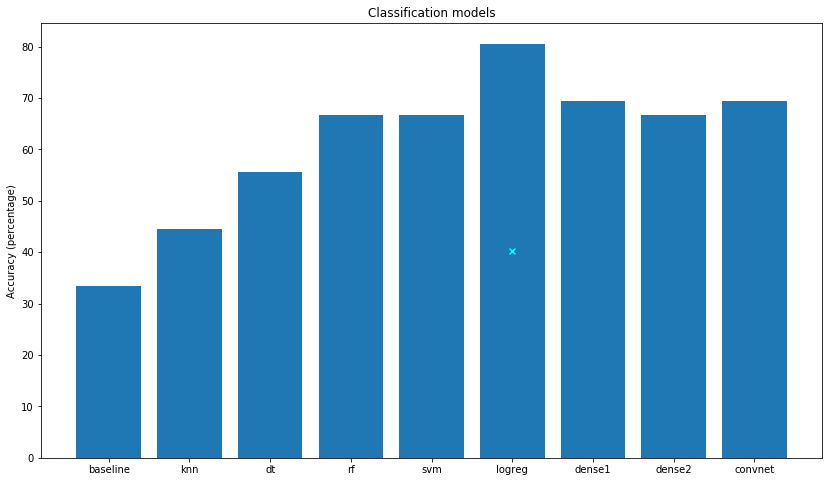

In [7]:
# Display the results in a graph. 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (14, 8))
axes.bar(classification_results.index, classification_results.values, width = 0.8)
axes.set_ylabel('Accuracy (percentage)')
axes.set_title('Classification models')

# Point the best model on the graph. 
axes.scatter(classification_results.idxmax(), classification_results.max() / 2, marker = 'x', c = 'cyan', zorder = 10);

**Result: All the classification models perform better than the baseline**. The model with the highest accuracy is the **logistic regression model**. We should remember that the accuracy of the convolutional neural network model is not a straightforward measure, but the combination of the predictions of multiple convolutional networks accross the three neurological views. 

### 2.2 Rescaling mode comparison

In the following cells, we compare again the accuracy of the classification models, but this time we display the results for **all the possible rescaling modes**: original voxel size, and voxel size rescaled by a factor 2, 3 or 4. 

In [8]:
# Define a DataFrame to save the results. 
all_classification_results = pd.DataFrame()

# Loop over all the rescale modes. 
for rescale_mode in ['', '_r2', '_r3', '_r4']:
    
    # Load the classification results. 
    load_classification_results(rescale_mode)
    load_neural_networks_results(rescale_mode)

    # Load the results into the DataFrame. 
    all_classification_results.loc['baseline', rescale_mode] = 33.33
    for classification_model in ['knn', 'dt', 'rf', 'svm', 'logreg', 'dense1', 'dense2', 'convnet']:
        all_classification_results.loc[classification_model, rescale_mode] = np.round(100 * eval('test_score_' + classification_model), 2)

# Rename the columns and display the DataFrame. 
all_classification_results.columns = ['Original size', 'Factor 2', 'Factor 3', 'Factor 4']
all_classification_results

,Original size,Factor 2,Factor 3,Factor 4
baseline,33.33,33.33,33.33,33.33
knn,44.44,44.44,58.33,41.67
dt,55.56,47.22,47.22,50.00
rf,66.67,47.22,66.67,47.22
svm,66.67,66.67,80.56,75.00
logreg,80.56,77.78,83.33,58.33
dense1,69.44,66.67,86.11,61.11
dense2,66.67,69.44,55.56,50.00
convnet,69.44,75.00,77.78,77.78


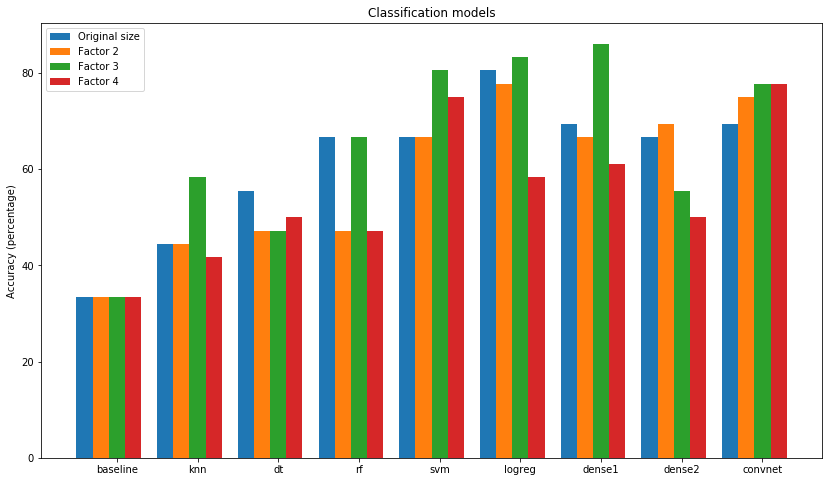

In [9]:
# Display the results in a graph. 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (14, 8))
x_coord = np.array(range(0, 9))

for rescale_mode in ['Original size', 'Factor 2', 'Factor 3', 'Factor 4']:
    axes.bar(x_coord, all_classification_results[rescale_mode].values, width = 0.2, label = rescale_mode)
    x_coord = x_coord + 0.2

# Add labels and title. 
axes.set_xticks(np.array(range(0, 9)) + 0.4)
axes.set_xticklabels(['baseline', 'knn', 'dt', 'rf', 'svm', 'logreg', 'dense1', 'dense2', 'convnet'])
axes.set_ylabel('Accuracy (percentage)')
axes.legend()
axes.set_title('Classification models');

**Result: All the classification models, for all the rescaling modes, perform better than the baseline**. The dataset with the original voxel size does not always give the best results. This is interesting to know, since the computations are much heavier with the original voxel size than with the rescaled voxel sizes. Overall, it is difficult to see a general tendency in favor of more or less rescaling. If this type of work had to be replicated with an entirely different neuroimaging dataset, it may be interesting to also systematically explore the results across several rescaling modes, since the right rescaling factor might depend on the dataset. For example, experimental conditions that recruit large brain networks might be easier to process with voxel size rescaling, whereas the original voxel size should maybe be kept for experimental conditions that recruit small, specific brain regions. 

### 2.3 Predictions comparison

In the following cells, we **compare the predictions** of the different classification models with the original voxel size. In particular, we verify how many different labels were predicted by the models for each statistical map.  

In [10]:
# Load the classification results. 
load_classification_results('')
load_neural_networks_results('')

# Get the predictions of all classification models, as well as the true value. 
y_pred_all = pd.DataFrame()
y_pred_all['true value'] = y_te
y_pred_all_unique = np.zeros(36)
for classification_model in ['knn', 'dt', 'rf', 'svm', 'logreg', 'dense1', 'dense2', 'convnet']:
    y_pred_all[classification_model] = eval('y_pred_' + classification_model)

# Compute the number of unique values predicted by the classification models. 
for statistical_map_index in range(0, 36):
    y_pred_all_unique[statistical_map_index] = np.unique(y_pred_all.iloc[statistical_map_index, 1:]).shape[0]

# Display these predictions. 
y_pred_all

,true value,knn,dt,rf,svm,logreg,dense1,dense2,convnet
0,good,bad,good,bad,good,good,bad,good,good
1,good,bad,bad,bad,good,good,bad,good,good
2,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,good
3,neutral,neutral,neutral,neutral,good,neutral,bad,neutral,good
4,bad,bad,bad,bad,bad,bad,bad,bad,bad
5,bad,neutral,bad,bad,bad,bad,bad,bad,bad
6,good,good,good,neutral,neutral,good,neutral,neutral,good
7,good,good,good,good,good,good,neutral,neutral,good
8,neutral,good,good,neutral,neutral,neutral,neutral,neutral,neutral
9,neutral,good,good,neutral,neutral,neutral,neutral,neutral,neutral


In [11]:
# Display the number of unique values predicted by the classification models. 
y_pred_all_unique

array([2., 2., 2., 3., 1., 2., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2.,
       1., 1., 1., 3., 3., 2., 2., 3., 1., 3., 3., 1., 1., 2., 2., 2., 2.,
       2., 2.])

In [12]:
# When all models agree, verify if they predicted the right value. 
# We compare the true values with the values predicted by one of the models, in the situations where all the models agree. 
y_te[y_pred_all_unique == 1] == y_pred_knn[y_pred_all_unique == 1]

array([ True,  True,  True,  True, False,  True,  True])

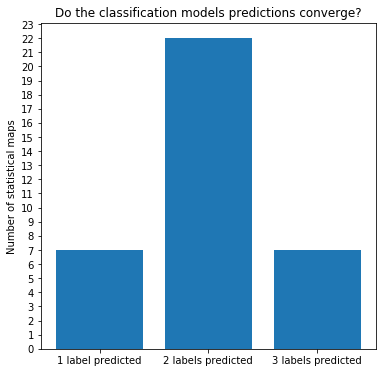

In [13]:
# Count how many different labels were attributed to each statistical map in the test set. 
y_pred_all_unique_count = pd.Series(y_pred_all_unique).value_counts().sort_index()

# Display the result in a bar plot. 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 6))
axes.bar([1, 2, 3], y_pred_all_unique_count.values)
axes.set_xticks([1, 2, 3])
axes.set_xticklabels(['1 label predicted', '2 labels predicted', '3 labels predicted'])
axes.set_yticks(range(0, y_pred_all_unique_count.max() + 2))
axes.set_ylabel('Number of statistical maps')
axes.set_title('Do the classification models predictions converge?');

**Result:** The predictions of the different classification models **converge on some statistical maps, and diverge on others**. When all models agree, they predicted the right value most of the time, but not always. 

### 2.4 Voting mechanism

In the following cells, we implement a **weighted voting mechanism** in order to pool all the predictions from our classification models, starting with the dataset with the original voxel size. For each statistical map in the test set, we sum up the predictions of the k-NN, decision tree, random forest, SVM, logistic regression, 1-layer neural network, 2-layer neural network and convolutional neural network models, weighted by the difference between the accuracy of these models and the baseline of 33%. This weighted voting mechanism is quite experimental, but it gives an idea of the accuracy that can be reached if we pool all the predictions. A more advanced weighted voting mechanism could, for example, use when possible the probabilities computed by the models for the different target classes. 

In [14]:
# Define a function to apply a weighted voting mechanism. 
def voting_mechanism():
    vote_array = np.zeros((36, 3))
    target_values = np.array(['good', 'neutral', 'bad'])

    # Loop over all models, statistical maps of the test set and possible target values. 
    for classification_model in ['knn', 'dt', 'rf', 'svm', 'logreg', 'dense1', 'dense2', 'convnet']:
        for statistical_map_index in range(0, 36):
            for target_index in range(0, 3):
                if eval('y_pred_' + classification_model)[statistical_map_index] == target_values[target_index]:
                    weighted_vote = eval('test_score_' + classification_model) - 1/3
                    vote_array[statistical_map_index, target_index] += weighted_vote

    # Compute the predictions and the accuracy. 
    y_pred_voting = target_values[vote_array.argmax(axis = 1)]
    voting_accuracy = np.sum(y_te == y_pred_voting) / y_te.shape[0]
    return y_pred_voting, voting_accuracy

In [15]:
# Define a function to apply a weighted voting mechanism through all the rescale modes. 
def voting_mechanism_all_rescale_modes():
    vote_array = np.zeros((36, 3))
    target_values = np.array(['good', 'neutral', 'bad'])

    # Loop over all rescale modes, models, statistical maps of the test set and possible target values. 
    for rescale_mode in ['', '_r2', '_r3', '_r4']:
        load_classification_results(rescale_mode)
        load_neural_networks_results(rescale_mode)
        for classification_model in ['knn', 'dt', 'rf', 'svm', 'logreg', 'dense1', 'dense2', 'convnet']:
            for statistical_map_index in range(0, 36):
                for target_index in range(0, 3):
                    if eval('y_pred_' + classification_model)[statistical_map_index] == target_values[target_index]:
                        weighted_vote = eval('test_score_' + classification_model) - 1/3
                        vote_array[statistical_map_index, target_index] += weighted_vote

    # Compute the predictions and the accuracy. 
    y_pred_voting = target_values[vote_array.argmax(axis = 1)]
    voting_accuracy = np.sum(y_te == y_pred_voting) / y_te.shape[0]
    return y_pred_voting, voting_accuracy

In [16]:
# Define a function to generate a Scikit-learn confusion matrix. 
def scikit_learn_confusion_matrix(y_te, y_pred):
    # Compute the confusion matrix. 
    labels = ['good', 'neutral', 'bad']
    matrix = confusion_matrix(
        y_true = y_te,
        y_pred = y_pred, 
        labels = labels
    )

    # Return confusion matrix as a DataFrame. 
    matrix_df = pd.DataFrame(data = matrix, columns = labels, index = labels)
    matrix_df.columns.name = 'Predictions'
    matrix_df.index.name = 'True class'
    return matrix_df

In [17]:
# Load the classification results. 
load_classification_results('')
load_neural_networks_results('')

# Compute the predictions through a voting mechanism. 
y_pred_voting, voting_accuracy = voting_mechanism()
y_pred_voting

array(['good', 'good', 'neutral', 'neutral', 'bad', 'bad', 'neutral',
       'good', 'neutral', 'neutral', 'good', 'good', 'neutral', 'neutral',
       'neutral', 'neutral', 'bad', 'bad', 'good', 'good', 'neutral',
       'neutral', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad',
       'neutral', 'good', 'neutral', 'neutral', 'bad', 'good'],
      dtype='<U7')

In [18]:
# Display a Scikit-learn confusion matrix. 
confusion_matrix_voting = scikit_learn_confusion_matrix(y_te, y_pred_voting)
confusion_matrix_voting

Predictions,good,neutral,bad
True class,,,
good,7,4,1
neutral,0,10,2
bad,3,0,9


In [19]:
# Display the accuracy obtained through the voting mechanism. 
voting_accuracy

0.7222222222222222

In [20]:
# Display the models that outperform the voting accuracy. 
classification_results[classification_results > (100 * voting_accuracy)]

logreg    80.56
dtype: float64

**Result (1/2):** This experimental weighted voting mechanism achieves a **relatively good accuracy**, better than most individual models. Overall, when this mechanism is applied, the good, neutral and bad maps are relatively well classified. In the following cells, we apply the same process, but this time we use the predictions from all the rescaling modes. 

In [21]:
# Compute the predictions through a voting mechanism. 
y_pred_voting, voting_accuracy = voting_mechanism_all_rescale_modes()
y_pred_voting

array(['good', 'good', 'neutral', 'good', 'bad', 'bad', 'good', 'good',
       'neutral', 'neutral', 'bad', 'good', 'neutral', 'good', 'neutral',
       'neutral', 'bad', 'bad', 'good', 'good', 'neutral', 'neutral',
       'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'neutral',
       'good', 'neutral', 'neutral', 'bad', 'good'], dtype='<U7')

In [22]:
# Display a Scikit-learn confusion matrix. 
confusion_matrix_voting = scikit_learn_confusion_matrix(y_te, y_pred_voting)
confusion_matrix_voting

Predictions,good,neutral,bad
True class,,,
good,9,2,1
neutral,1,9,2
bad,2,0,10


In [23]:
# Display the accuracy obtained through the voting mechanism. 
voting_accuracy

0.7777777777777778

**Result (2/2):** This experimental weighted voting mechanism achieves also a **relatively good accuracy** when applied to all our results through the different rescaling modes. Overall, when this mechanism is applied, the good, neutral and bad maps are also relatively well classified. 

## **3. Regression results**

### 3.1 Model comparison

In the following cells, we **compare the performance of the regression models**, using the dataset with the original voxel size. By default, we use the Mean Squared Error (MSE) as a comparison metric, since this is the measure we used for the fine-tuning of the Ridge model. But we can also display the graph using the Mean Average Error (MAE), since this metric has a straigtforward interpretation: it measures the average difference between the true value and the predicted value for every voxel or cluster of interest in the test set. Both metrics give similar results. 

In [24]:
# Load the regression results. 
load_regression_results('')

# Define the comparison metric: 'mse', 'mae', 'rss' or 'r2'. 
comparison_metric = 'mse'

# Convert the results into a Series. 
regression_results = pd.Series()
for regression_model in ['baseline', 'lr', 'huber', 'ridge', 'lr_categ', 'huber_categ', 'ridge_categ']:
    regression_results[regression_model] = np.round(eval(comparison_metric + '_' + regression_model), 5)
    
# Display the Series. 
regression_results

baseline       4.05629
lr             2.42136
huber          1.69328
ridge          2.42144
lr_categ       2.42208
huber_categ    1.69542
ridge_categ    2.42137
dtype: float64

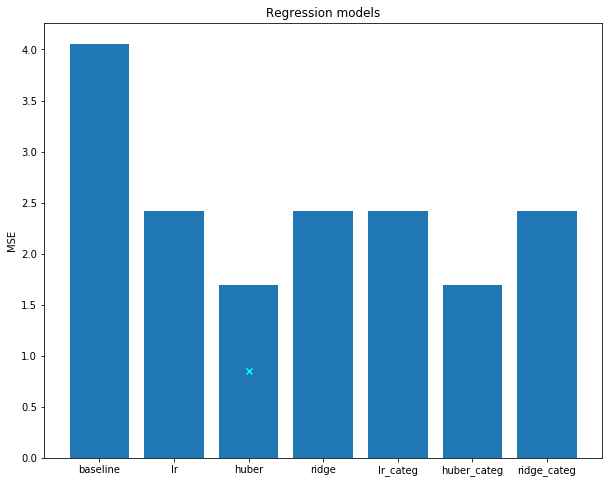

In [25]:
# Display the results in a graph. 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8))
axes.bar(regression_results.index, regression_results.values, width = 0.8)
axes.set_ylabel(comparison_metric.upper())
axes.set_title('Regression models')

# Point the best model on the graph. 
axes.scatter(regression_results.idxmin(), regression_results.min() / 2, marker = 'x', c = 'cyan', zorder = 10);

**Result: All the regression models perform better than the baseline**. The **regression with Huber loss without the categorical variable** shows the best performance. As we discussed in the previous Notebook, the linear regression and the Ridge regression give very similar results, and adding the categorical variable does not improve the performance. 

### 3.2 Rescale mode comparison

In the following cells, we compare again the performance of the regression models, but this time we display the results for **all the possible rescaling modes**: original voxel size, and voxel size rescaled by a factor 2, 3 or 4. 

In [26]:
# Define the comparison metric: 'mse', 'mae', 'rss' or 'r2'. 
comparison_metric = 'mse'

# Define a DataFrame to save the results. 
all_regression_results = pd.DataFrame()

# Loop over all the rescale modes. 
for rescale_mode in ['', '_r2', '_r3', '_r4']:
    
    # Load the regression results. 
    load_regression_results(rescale_mode)

    # Load the results into the DataFrame. 
    for regression_model in ['baseline', 'lr', 'huber', 'ridge', 'lr_categ', 'huber_categ', 'ridge_categ']:
        all_regression_results.loc[regression_model, rescale_mode] = np.round(eval(comparison_metric + '_' + regression_model), 5)

# Rename the columns and display the DataFrame. 
all_regression_results.columns = ['Original size', 'Factor 2', 'Factor 3', 'Factor 4']
all_regression_results

,Original size,Factor 2,Factor 3,Factor 4
baseline,4.05629,12.35300,16.65456,10.95531
lr,2.42136,2.72662,4.35007,1.54814
huber,1.69328,2.31718,3.07093,1.58485
ridge,2.42144,2.72750,4.35205,1.54793
lr_categ,2.42208,2.72658,4.36039,1.54845
huber_categ,1.69542,2.43438,3.38623,1.58486
ridge_categ,2.42137,2.72730,4.35324,1.54839


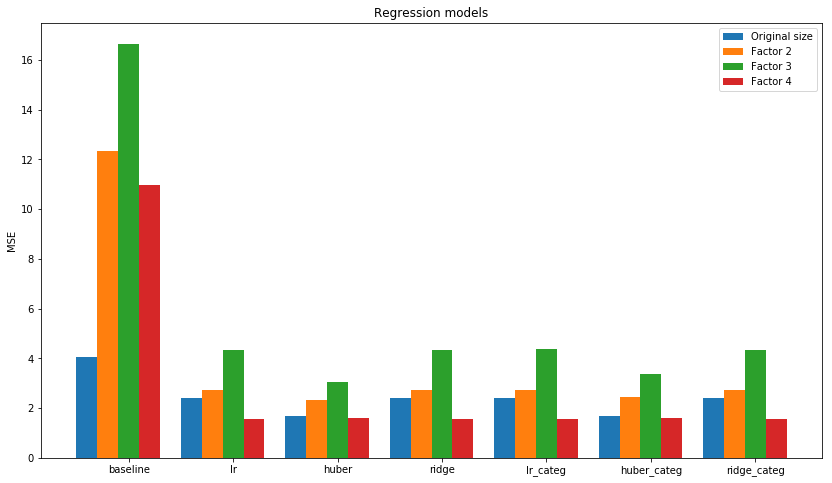

In [27]:
# Display the results in a graph. 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (14, 8))
x_coord = np.array(range(0, 7))

for rescale_mode in ['Original size', 'Factor 2', 'Factor 3', 'Factor 4']:
    axes.bar(x_coord, all_regression_results[rescale_mode].values, width = 0.2, label = rescale_mode)
    x_coord = x_coord + 0.2

# Add labels and title. 
axes.set_xticks(np.array(range(0, 7)) + 0.4)
axes.set_xticklabels(['baseline', 'lr', 'huber', 'ridge', 'lr_categ', 'huber_categ', 'ridge_categ'])
axes.set_ylabel(comparison_metric.upper())
axes.legend()
axes.set_title('Regression models');

**Result: All the regression models, for all the rescaling modes, perform better than the baseline**. Like for the classification models, the dataset with the original voxel size does not always give the best results. Overall, it is again difficult to see a general tendency in favor of more or less rescaling, except maybe for the baseline which is better with the original voxel size. Again, if this type of work had to be replicated with an entirely different neuroimaging dataset, it may be interesting to also systematically explore the results across several rescaling modes, since the right rescaling factor might depend on the dataset. For example, the experimental conditions, but also the original voxel size, the raw voxel size from the fMRI scanner and the neuroimaging pipeline used to create the statistical maps, might all have an influence. 

## **4. Discussion**

The problem addressed by this project presented three significant initial difficulties. First, the **dimensionality of our dataset was very high** compared to its cardinality. Second, for the classification task, the EDA showed **no clear relationship between the features and the target**, i.e. between the values from the statistical maps and the good, neutral and bad experimental conditions. Third, also for the classification task, it appeared **very difficult to recognize the patterns with visual inspection**, which could raise the question whether the problem could even be solved by machine learning models. 

Despite these difficulties, **all the classification and regression models performed better than the baseline**. Some models achieved even a relatively good performance, while other models performed just slightly better than the baseline. Specifically, k-NN models are often particularly affected by the curse of dimensionality, and indeed, our k-NN model achieved only a modest performance. Neural networks are stochastic by nature and the results can vary with every run, but overall the accuracy of the 1-layer and 2-layer dense networks were quite similar. This seems to indicate that there is no significant benefit to add a hidden layer, maybe because we work with well-structured, highly-normalized statistical maps, where all the relevant information might be directly extracted by a simple 1-layer network. 

This project provided the opportunity to develop and test two experimental methods: the **combination of multiple convolutional neural networks** trained accross several sections of all neurological views, and the **computation of a predictability map** covering all the clusters of the brain. These two methods were quite interesting to imagine and implement, and allowed us to expand our analysis possibilities. For example, we were able to evaluate the accuracy of convolutional networks through the sagittal, coronal and axial view, and to identify the most predictable and least predictable clusters of the brain in our dataset. 

This project also raises **multiple questions**. Can we apply machine learning models to all sorts of neuroimaging datasets? Are some statistical maps easier to classify than others? Are some rescaling modes more relevant than others? How could we explain that for some statistical maps, most classification models converge on the same result, while they diverge for others? What kind of scientific knowledge could we extract from predictability maps?

It is probable that **more opportunities for data analysis and machine learning will arise** when more and more researchers will store and share their data in open data repositories like NeuroVault. Since the fMRI studies tend to include more and more subjects, hopefully the datasets will also become larger, and machine learning might one day become a part of the standard neuroimaging analysis pipeline. 

## **5. Conclusion**

This project demonstrated that it is possible to **train machine learning models to recognize and predict brain activity**. Classification models can be used to classify statistical maps with an accuracy higher than the level of chance, and regression models can be used to predict the value of a specific voxel or cluster with a performance better than the baseline. Overall, the success of these models seems to prove that **machine learning can be used to extract subtle patterns from fMRI data**, which are on the other hand very difficult to recognize by visual inspection. 

As we mentioned in the introduction of the first Notebook, the objective of a neuroimaging research using fMRI is to obtain relevant and generalizable knowledge about the brain activity. For a given fMRI dataset, proving that machine learning models can be trained to classify and predict the brain activity could be a **strong argument in favor of relevance and generalization**. This project was conducted on a specific fMRI dataset, but the analyses developed in these Notebooks could likely be applied to other functional neuroimaging studies. Therefore, they might present an interest for the neuroimaging community, as well as for machine learning developers. 